# import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Preparing and Understanding the data

In [2]:
df=pd.read_csv("vehicles.csv") 
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.sample(10, random_state=100)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
386556,7310167837,https://stgeorge.craigslist.org/ctd/d/salt-lak...,st george,https://stgeorge.craigslist.org,8550,2013.0,toyota,sienna,NaN,6 cylinders,...,NaN,van,silver,https://images.craigslist.org/00r0r_gjqHwSh3WB...,Engine: 6 Cylinders Transmission: Automatic Ti...,NaN,ut,40.746636,-111.939633,2021-04-20T20:28:56-0600
48650,7316539496,https://reno.craigslist.org/ctd/d/sacramento-2...,reno / tahoe,https://reno.craigslist.org,0,2015.0,ford,f-550 f550 f 550,excellent,10 cylinders,...,full-size,truck,white,https://images.craigslist.org/00909_99KdbM2Z2e...,"MONTHLY PUBLIC AUCTION SATURDAY – MAY 8th, 202...",NaN,ca,38.553900,-121.369300,2021-05-03T18:00:45-0700
373265,7304670264,https://elpaso.craigslist.org/ctd/d/el-paso-19...,el paso,https://elpaso.craigslist.org,8800,1999.0,chevrolet,corvette,NaN,NaN,...,NaN,coupe,silver,https://images.craigslist.org/00A0A_3vakBK4mjQ...,"1999 Chevrolet, Chevy Corvette Hardtop ☎ 915-2...",NaN,tx,31.810800,-106.240000,2021-04-10T09:05:37-0600
135832,7316937484,https://spokane.craigslist.org/ctd/d/coeur-ale...,spokane / coeur d'alene,https://spokane.craigslist.org,5277,2007.0,subaru,outback 2.5i limited,like new,4 cylinders,...,mid-size,wagon,custom,https://images.craigslist.org/00c0c_eiSpRTtgn0...,2007 Subaru Outback when's and drives perfect ...,NaN,id,47.681600,-116.756900,2021-05-04T13:54:05-0700
421385,7306708288,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,34590,2018.0,dodge,durango gt sport utility,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,wi,43.070000,-89.380000,2021-04-14T11:11:00-0500
191837,7316270083,https://worcester.craigslist.org/ctd/d/rochdal...,worcester / central MA,https://worcester.craigslist.org,7900,2006.0,toyota,rav4 limited,excellent,4 cylinders,...,mid-size,SUV,brown,https://images.craigslist.org/01010_jxcC14bmMD...,Nice 4WD Toyota RAV4 with 101k miles. It is a ...,NaN,ma,42.199700,-71.906900,2021-05-03T12:49:34-0400
126048,7304217087,https://macon.craigslist.org/ctd/d/macon-2019-...,macon / warner robins,https://macon.craigslist.org,25590,2019.0,gmc,acadia sle-1 sport utility,good,NaN,...,NaN,SUV,black,https://images.craigslist.org/00l0l_2gNZhcpqfn...,Carvana is the safer way to buy a car During t...,NaN,ga,32.809500,-83.616800,2021-04-09T12:41:18-0400
49936,7313235399,https://reno.craigslist.org/ctd/d/atlanta-2015...,reno / tahoe,https://reno.craigslist.org,17990,2015.0,volkswagen,golf tdi sel,good,NaN,...,NaN,sedan,white,https://images.craigslist.org/00000_KNY0kE0TqA...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-27T04:21:07-0700
221323,7310333889,https://semo.craigslist.org/ctd/d/park-hills-2...,southeast missouri,https://semo.craigslist.org,29977,2000.0,chevrolet,corvette,NaN,8 cylinders,...,NaN,coupe,silver,https://images.craigslist.org/00p0p_gJP2rR3R6Q...,CarSmart of FarmingtonAsk for: Call Or Text☎ (...,NaN,mo,37.820812,-90.457720,2021-04-21T10:13:18-0500
171159,7316005187,https://lexington.craigslist.org/cto/d/berea-2...,lexington,https://lexington.craigslist.org,8900,2010.0,toyota,rav4,NaN,4 cylinders,...,NaN,NaN,white,https://images.craigslist.org/00P0P_kme70OkdfY...,"2010 Toyota RAV4 limited 2.5L 4cyl auto, leath...",NaN,ky,37.601746,-84.301924,2021-05-02T20:10:24-0400


In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df.shape

(426880, 26)

In [7]:
df.describe()


,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
df.year.unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [9]:
df.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [10]:
df.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [11]:
df.paint_color.unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [12]:
df.corr()

,id,price,year,odometer,county,lat,long
id,1.000000,-0.002779,-0.059040,0.010721,NaN,-0.069388,-0.121864
price,-0.002779,1.000000,-0.004925,0.010032,NaN,0.000357,-0.000408
year,-0.059040,-0.004925,1.000000,-0.157215,NaN,-0.014677,-0.001410
odometer,0.010721,0.010032,-0.157215,1.000000,NaN,-0.001459,0.009807
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.069388,0.000357,-0.014677,-0.001459,NaN,1.000000,-0.128088
long,-0.121864,-0.000408,-0.001410,0.009807,NaN,-0.128088,1.000000


In [13]:
df.shape

(426880, 26)

# Split data 

In [14]:
df_train,df_test=train_test_split(df,test_size=0.09 , random_state=0)

In [15]:
df_train,df_val=train_test_split(df_train,test_size=0.1, random_state=100)

In [16]:
df_train.shape

(349614, 26)

In [17]:
df_val.shape

(38846, 26)

In [18]:
df_test.shape

(38420, 26)

# Cleaning data 

Cleaning train part

drop unuseful colums 


In [19]:
df_train=df_train.drop(columns= ['id','url', 'region', 'region_url', 'VIN', 'image_url', 'description', \
    'county', 'size', 'paint_color', 'state', 'lat','long',"posting_date","model"])

In [20]:
df_train.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type'],
      dtype='object')

In [21]:
df_train.isna().sum()

price                0
year              1002
manufacturer     14563
condition       142402
cylinders       145664
fuel              2444
odometer          3614
title_status      6687
transmission      2088
drive           107168
type             76173
dtype: int64

In [22]:
df_train.shape

(349614, 11)

In [23]:
#df_train=df_train.dropna(how="any")

In [24]:
df_train.shape

(349614, 11)

In [25]:
cylinder_dict = {
    '8 cylinders': 8,
    '6 cylinders': 6,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '3 cylinders': 3,
    '10 cylinders': 10,
    '12 cylinders': 12
}

In [26]:
df_train['cylinders'] = df.cylinders.map(cylinder_dict)

In [27]:
df_train.cylinders.unique()

array([ 6.,  4., nan,  8.,  5.,  3., 10., 12.])

In [28]:
df_train.cylinders.mean()

5.971149202093581

In [29]:
df_train['cylinders'].fillna(6, inplace=True)

In [30]:
df_train.isna().sum()

price                0
year              1002
manufacturer     14563
condition       142402
cylinders            0
fuel              2444
odometer          3614
title_status      6687
transmission      2088
drive           107168
type             76173
dtype: int64

In [31]:
condition1=df_train['condition']
condition1.value_counts()

good         99719
excellent    82980
like new     17394
fair          5551
new           1064
salvage        504
Name: condition, dtype: int64

In [32]:
df_train['condition'].fillna('good', inplace=True)

In [33]:
drive1=df_train['drive']
drive1.value_counts()

4wd    107770
fwd     86334
rwd     48342
Name: drive, dtype: int64

In [34]:
df_train['drive'].fillna('4wd', inplace=True)

In [35]:
df_train.isna().sum()

price               0
year             1002
manufacturer    14563
condition           0
cylinders           0
fuel             2444
odometer         3614
title_status     6687
transmission     2088
drive               0
type            76173
dtype: int64

In [36]:
df_train=df_train.dropna(how="any")

In [37]:
df_train.isna().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64

In [38]:
df_train.drop_duplicates(inplace=True)

In [39]:
df_train.shape

(145033, 11)

In [40]:
df_train=df_train[(df_train.price >0)]

In [41]:
df_train=df_train[df_train.condition != 'new']

In [42]:
df_train.condition.value_counts()

good         78535
excellent    41993
like new      9660
fair          3760
salvage        331
Name: condition, dtype: int64

In [43]:
df_train=df_train[df_train.title_status != 'parts only']



In [44]:
df_train=df_train[(df_train.fuel != 'other')]



In [45]:
df_train.fuel.value_counts()

gas         119304
diesel        6633
hybrid        1791
electric       498
Name: fuel, dtype: int64

In [46]:
df_train=df_train[(df_train.transmission != 'other')]

In [47]:
df_train.transmission.value_counts()

automatic    112400
manual         9029
Name: transmission, dtype: int64

In [48]:
df_train.shape

(121429, 11)

# Data Visualization

<AxesSubplot:title={'center':'Price Distribution'}, xlabel='price', ylabel='Count'>

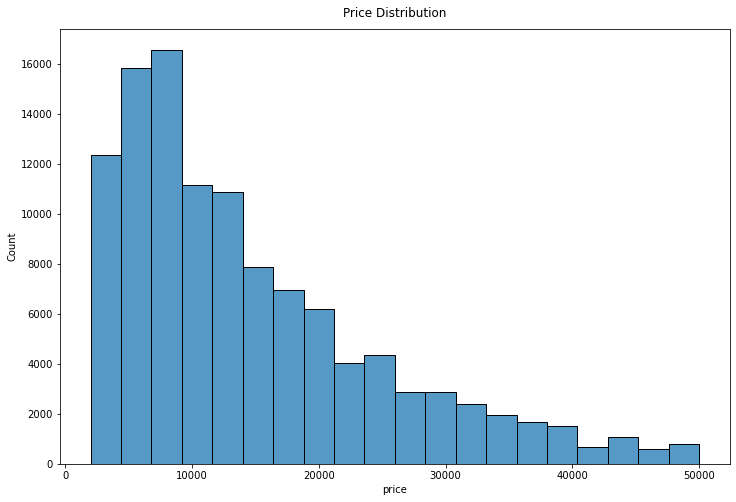

In [49]:
df_prc =df_train[(df_train.price >=2000) & (df_train.price <=50000)]
# Then plot the distriution 
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Price Distribution', pad=12)
sns.histplot(df_prc, x="price", stat='count', bins=20)

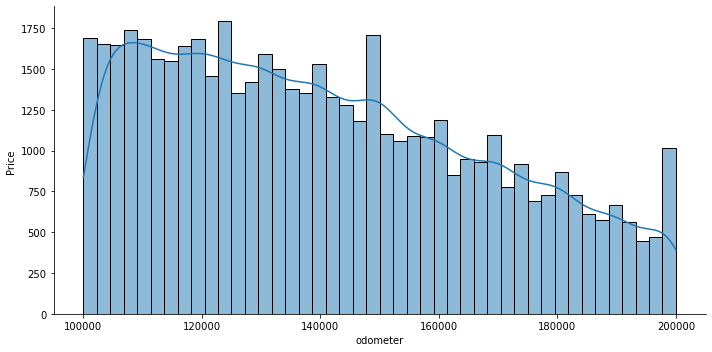

In [50]:
train_prc = df_train[(df_train.price >=2000) & (df_train.price <=50000)]
train_odo = train_prc[(train_prc.odometer >100000) & (train_prc.odometer <=200000)]
sns.displot(data=train_odo, x="odometer", aspect=2, height=5, kde=True)
plt.ylabel("Price ", fontsize=10);

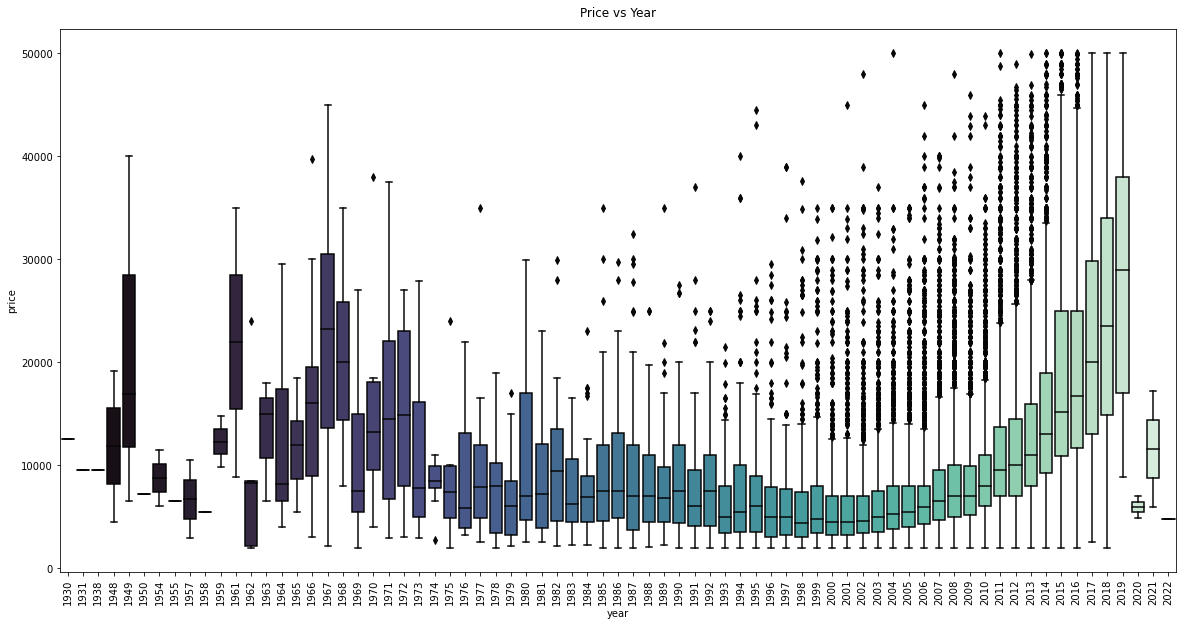

In [51]:
f, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Price vs Year', pad=12)
fig = sns.boxplot(x=train_odo.year.astype(int), y='price', data=train_odo,palette="mako")
plt.xticks(rotation=90);

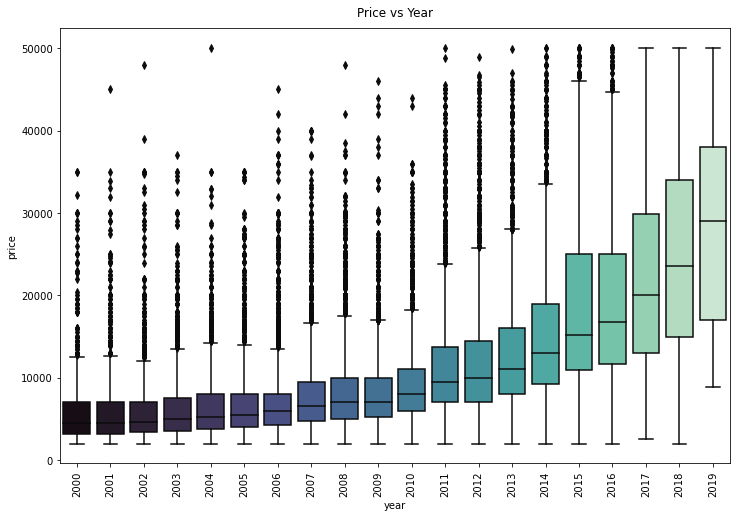

In [52]:
year_list = list(range(2000, 2020))

train_year = train_odo[train_odo.year.astype(int).isin(year_list)]

# Plot again to visualize distribution
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Price vs Year', pad=12)
fig = sns.boxplot(x=train_year.year.astype(int), y='price', data=train_year,palette="mako")
plt.xticks(rotation=90);

# Encode trian set 

<AxesSubplot:>

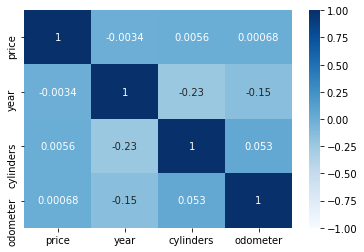

In [53]:
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, vmin=-1, vmax=1)

In [54]:
 df_train.select_dtypes(exclude=['object'])

,price,year,cylinders,odometer
126407,19491,2013.0,6.0,79893.0
232571,7995,2007.0,4.0,121841.0
36714,9995,2011.0,4.0,131690.0
327134,37995,2018.0,6.0,50290.0
173655,9797,2010.0,6.0,85078.0
...,...,...,...,...
89139,13995,2013.0,6.0,86758.0
303840,1795,2005.0,6.0,233000.0
163254,2800,2003.0,4.0,186169.0
325147,25995,2016.0,6.0,116392.0


In [55]:
df_train=pd.get_dummies(df_train, columns=["manufacturer"])

In [56]:
df_train=pd.get_dummies(df_train, columns=["condition"])

In [57]:
df_train=pd.get_dummies(df_train, columns=["fuel"])

In [58]:
df_train=pd.get_dummies(df_train, columns=["transmission"])

In [59]:
df_train=pd.get_dummies(df_train, columns=["type"])

In [60]:
df_train=pd.get_dummies(df_train, columns=["drive"])

In [61]:
df_train=pd.get_dummies(df_train, columns=["title_status"])

In [62]:
df_train

,price,year,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,type_van,type_wagon,drive_4wd,drive_fwd,drive_rwd,title_status_clean,title_status_lien,title_status_missing,title_status_rebuilt,title_status_salvage
126407,19491,2013.0,6.0,79893.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
232571,7995,2007.0,4.0,121841.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36714,9995,2011.0,4.0,131690.0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
327134,37995,2018.0,6.0,50290.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
173655,9797,2010.0,6.0,85078.0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89139,13995,2013.0,6.0,86758.0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
303840,1795,2005.0,6.0,233000.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
163254,2800,2003.0,4.0,186169.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
325147,25995,2016.0,6.0,116392.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [63]:
df_train["manufacturer_aston-martin"].value_counts()

0    121419
1        10
Name: manufacturer_aston-martin, dtype: int64

In [64]:
df_train["manufacturer_morgan"].value_counts()

0    121428
1         1
Name: manufacturer_morgan, dtype: int64

In [65]:
df_train=df_train.drop(columns= ["manufacturer_aston-martin","manufacturer_morgan"])

In [66]:
df_train.shape

(121429, 76)

# clean val set

In [67]:
df_val=df_val.drop(columns= ['id','url', 'region', 'region_url', 'VIN', 'image_url', 'description', \
    'county', 'size', 'paint_color', 'state', 'lat','long',"posting_date","model"])

In [68]:
cylinder_val_dict = {
    '8 cylinders': 8,
    '6 cylinders': 6,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '3 cylinders': 3,
    '10 cylinders': 10,
    '12 cylinders': 12
}

In [69]:
df_val['cylinders'] = df.cylinders.map(cylinder_val_dict)

In [70]:
df_val['cylinders'].fillna(6, inplace=True)

In [71]:
df_val['condition'].fillna('good', inplace=True)

In [72]:
df_val['drive'].fillna('4wd', inplace=True)

In [73]:
df_val=df_val.dropna(how="any")

In [75]:
df_val.shape

(23532, 11)

In [76]:
df_val=df_val[(df_val.price >0)]

In [77]:
df_val=df_val[(df_val.fuel != 'other')]

In [78]:
df_val= df_val[df_val.condition != 'new']

In [79]:
df_val= df_val[df_val.title_status != 'parts only']

In [80]:
df_val=df_val[(df_val.transmission != 'other')]

In [81]:
df_val.shape

(18146, 11)

# Encode val set

In [82]:
df_val.select_dtypes(exclude=['object'])

,price,year,cylinders,odometer
294100,9395,2010.0,6.0,155953.0
425673,19700,1953.0,6.0,41222.0
399672,12995,2018.0,6.0,90998.0
291374,11795,2014.0,6.0,40812.0
48306,23990,2016.0,6.0,57638.0
...,...,...,...,...
142228,3900,2013.0,6.0,1.0
98954,11900,2013.0,8.0,72000.0
365227,8500,2010.0,4.0,135433.0
326738,159,2016.0,4.0,126808.0


In [83]:
df_val=pd.get_dummies(df_val, columns=["manufacturer"])

In [84]:
df_val=pd.get_dummies(df_val, columns=["condition"])

In [85]:
df_val=pd.get_dummies(df_val, columns=["fuel"])

In [86]:
df_val=pd.get_dummies(df_val, columns=["title_status"])

In [87]:
df_val=pd.get_dummies(df_val, columns=["type"])

In [88]:
df_val=pd.get_dummies(df_val, columns=["transmission"])


In [89]:
df_val=pd.get_dummies(df_val, columns=["drive"])

In [90]:
df_val.shape

(18146, 76)

In [91]:
df_train.columns

Index(['price', 'year', 'cylinders', 'odometer', 'manufacturer_acura',
       'manufacturer_alfa-romeo', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_tesl

In [92]:
df_val.columns

Index(['price', 'year', 'cylinders', 'odometer', 'manufacturer_acura',
       'manufacturer_alfa-romeo', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_tesl

# LinearRegression Model


model 1 

In [93]:
df_train.columns

Index(['price', 'year', 'cylinders', 'odometer', 'manufacturer_acura',
       'manufacturer_alfa-romeo', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_tesl

In [94]:
X_train = df_train.loc[:,['year','odometer']]

y_train = df_train['price']

In [95]:
x_val = df_val.loc[:,['year','odometer']]

y_val = df_val['price']

In [96]:
lm=LinearRegression()

In [97]:
lm.fit(X_train, y_train)

LinearRegression()

In [182]:
lm.score(X_train, y_train)

7.556471826430933e-05

In [99]:
lm.score(x_val, y_val) 

-20.725774790234592

model 2

In [140]:
lm=LinearRegression()

In [141]:
X_train = df_train.loc[:,["cylinders"]]
y_train = df_train['price']

In [142]:
x_val = df_val.loc[:,["cylinders"]]

y_val = df_val['price']

In [143]:
lm.fit(X_train, y_train)

LinearRegression()

In [144]:
lm.score(X_train, y_train)

3.1820941765570154e-05

In [145]:
lm.score(x_val, y_val) 

-31.891734460992822

In [146]:
lm=LinearRegression()

In [147]:
X_train = df_train.loc[:,["odometer"]]
y_train = df_train['price']

In [148]:
lm.fit(X_train, y_train)

LinearRegression()

In [149]:
lm.score(X_train, y_train)

4.647321473205679e-07

In [150]:
lm=LinearRegression()

In [151]:
X_train = df_train.loc[:,['manufacturer_acura',
       'manufacturer_alfa-romeo', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toyota',
       'manufacturer_volkswagen', 'manufacturer_volvo']]
y_train = df_train['price']

In [152]:
lm.fit(X_train, y_train)

LinearRegression()

In [153]:
lm.score(X_train, y_train)

7.533628948896975e-05

In [154]:
lm=LinearRegression()

In [155]:
X_train = df_train.loc[:,['condition_excellent',
       'condition_fair', 'condition_good', 'condition_like new',
       'condition_salvage']]
y_train = df_train['price']

In [156]:
lm.fit(X_train, y_train)

LinearRegression()

In [157]:
lm.score(X_train, y_train)

4.938207506022252e-06

In [158]:
lm=LinearRegression()

In [159]:
X_train = df_train.loc[:,['fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid']]
y_train = df_train['price']

In [160]:
lm.fit(X_train, y_train)

LinearRegression()

In [161]:
lm.score(X_train, y_train)

4.9597391257205636e-05

In [162]:
X_train = df_train.loc[:,['transmission_automatic', 'transmission_manual']]
y_train = df_train['price']

In [163]:
lm.fit(X_train, y_train)

LinearRegression()

In [164]:
lm.score(X_train, y_train)

5.73571966977493e-06

In [165]:
lm=LinearRegression()

In [166]:
X_train = df_train.loc[:,['type_SUV', 'type_bus', 'type_convertible', 'type_coupe',
       'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other',
       'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon']]
y_train = df_train['price']

In [167]:
lm.fit(X_train, y_train)

LinearRegression()

In [168]:
lm.score(X_train, y_train)

0.00011066499101952676

In [169]:
X_train = df_train.loc[:,['drive_4wd', 'drive_fwd', 'drive_rwd']]
y_train = df_train['price']

In [170]:
lm.fit(X_train, y_train)

LinearRegression()

In [171]:
lm.score(X_train, y_train)

1.1841358905528843e-05

In [172]:
X_train = df_train.loc[:,['title_status_clean',
       'title_status_lien', 'title_status_missing', 'title_status_rebuilt',
       'title_status_salvage']]
y_train = df_train['price']

In [173]:
lm.fit(X_train, y_train)

LinearRegression()

In [174]:
lm.score(X_train, y_train)

9.859432343883867e-07

In [175]:
X_train = df_train.loc[:,['title_status_clean','transmission_automatic',  'fuel_gas',
       'condition_excellent',"odometer","cylinders","manufacturer_mercedes-benz"]]
y_train = df_train['price']

In [176]:
lm.fit(X_train, y_train)

LinearRegression()

In [177]:
lm.score(X_train, y_train)

7.556471826430933e-05

In [178]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')

Degree 2 polynomial regression train R^2: 0.000


In [179]:
## Ridge model
ridge =Ridge(alpha=1.0)

ridge.fit(X_train,y_train)

Ridge()

In [180]:
score = ridge.score(X_train,y_train)
print(f'Accuracy for ridge model is {score}')

Accuracy for ridge model is 7.556471757597105e-05
